# Simulation for the procurement of electricity

- Energy Utility Procurement
- A household customer portfolio 
- Expected sales to household customers in Year 2025
- 534 GWh
- Start of portfolio management is 1st Jan 2024
- End of portfolio management is 31st December 2024

### Procurement Strategy:
1. Four identical slices for each quarter;
2. The purchase trigger is a dynamic stop loss related to the base product with a spread of 0.4 EUR/MWh
3. The price was generated by stochastic process

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dynamic_stop_loss import *
from cost_benchmark import procurement_cost

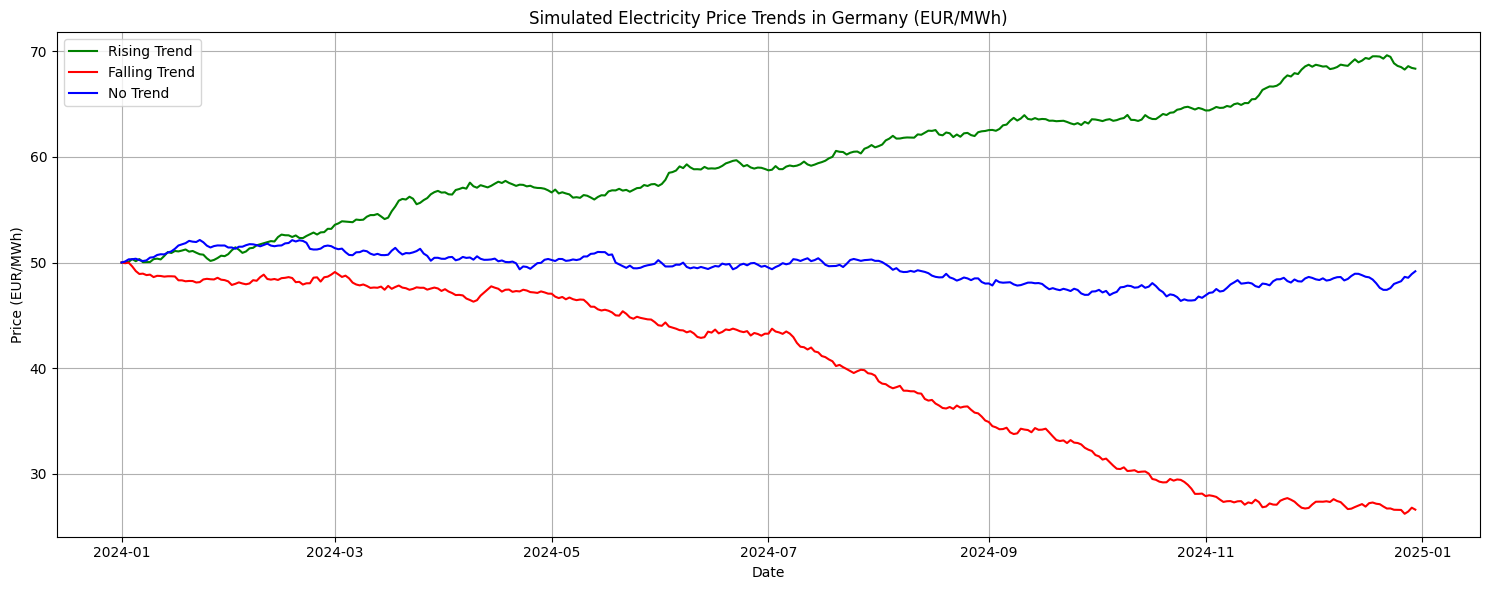

In [2]:

# Set the parameters for the Monte Carlo simulation
np.random.seed(21)
days = 365
initial_price = 50  # Starting price in EUR/MWh (based on historical data)
volatility = 0.2  # daily volatility in EUR/MWh
trend_rising = 0.05  # upward drift
trend_falling = -0.05  # downward drift
no_trend = 0  # no drift

# Function to simulate the price trends
def price_path_simulation(trend, initial_price, volatility, days):
    prices = [initial_price]
    for _ in range(1, days):
        daily_return = np.random.normal(trend, volatility)
        new_price = prices[-1] + daily_return
        # Ensure price does not go below zero
        new_price = max(new_price, 0)
        prices.append(new_price)
    return prices

# Simulate three trends
rising_prices = price_path_simulation(trend_rising, initial_price, volatility, days)
falling_prices = price_path_simulation(trend_falling, initial_price, volatility, days)
no_trend_prices = price_path_simulation(no_trend, initial_price, volatility, days)

# Create a DataFrame to store the results
dates = pd.date_range(start='2024-01-01', periods=days)
df = pd.DataFrame({
    'Date': dates,
    'Rising': rising_prices,
    'Falling': falling_prices,
    'No_Trend': no_trend_prices
})

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Rising'], label='Rising Trend', color='green')
plt.plot(df['Date'], df['Falling'], label='Falling Trend', color='red')
plt.plot(df['Date'], df['No_Trend'], label='No Trend', color='blue')
plt.title('Simulated Electricity Price Trends in Germany (EUR/MWh)')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, save the data to a CSV file
# df.to_csv('simulated_electricity_prices.csv', index=False)


## Procurement on different trends

In [ ]:
df_rising = pd.DataFrame({"Dates":dates,'Price': rising_prices})
df_falling = pd.DataFrame({"Dates":dates, 'Price': falling_prices})
df_no_trend = pd.DataFrame({"Dates":dates, 'Price': no_trend_prices})

In [7]:
rising_average_price = df_rising['Price'].mean()
falling_average_price = df_falling['Price'].mean()
no_trend_average_price = df_no_trend['Price'].mean()

In [8]:
rising_average_price, falling_average_price, no_trend_average_price

(59.54105801303712, 39.77172896658303, 49.480519335792835)

Quarterly procurement on the rising trend

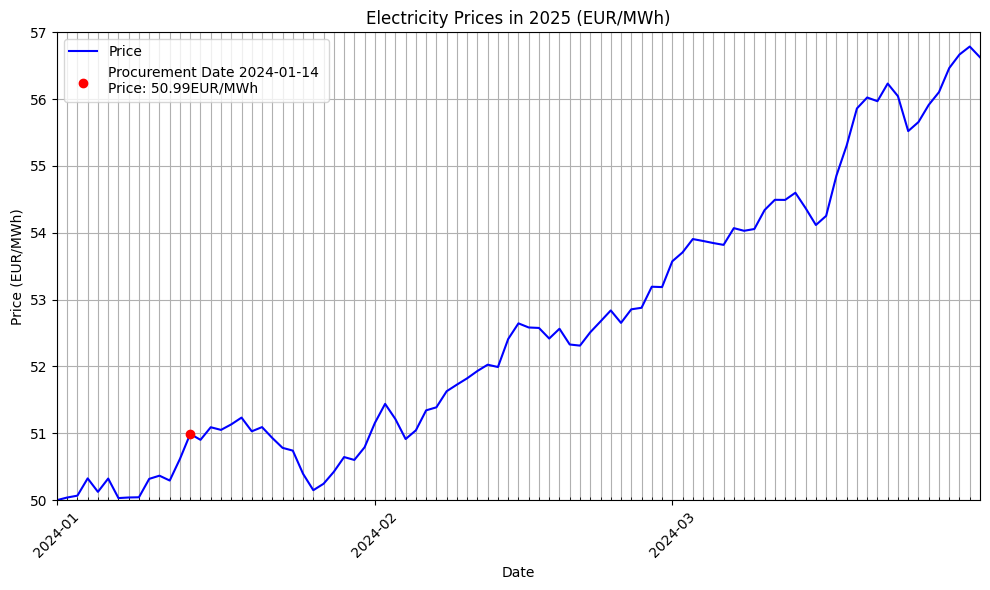

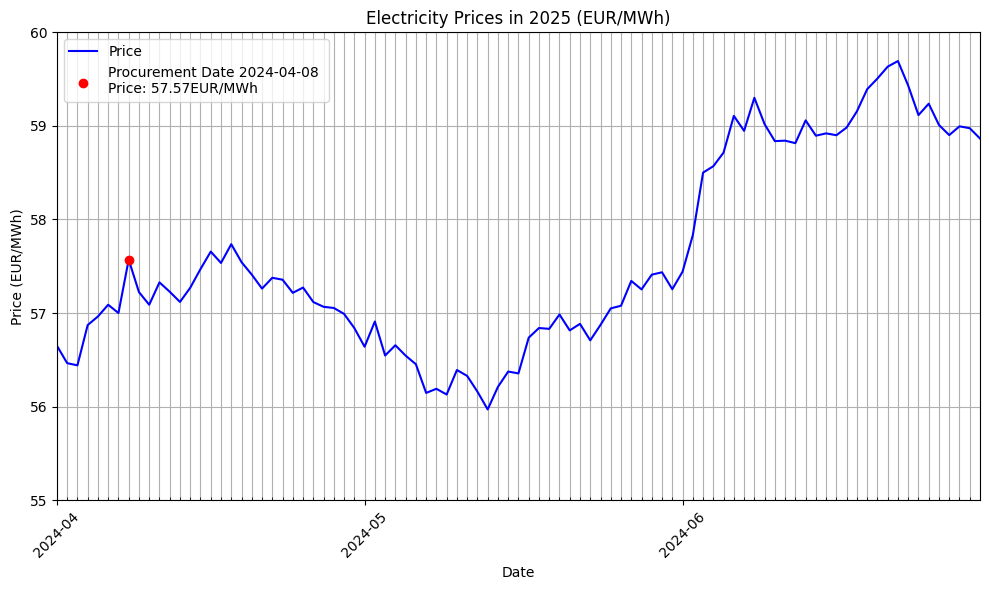

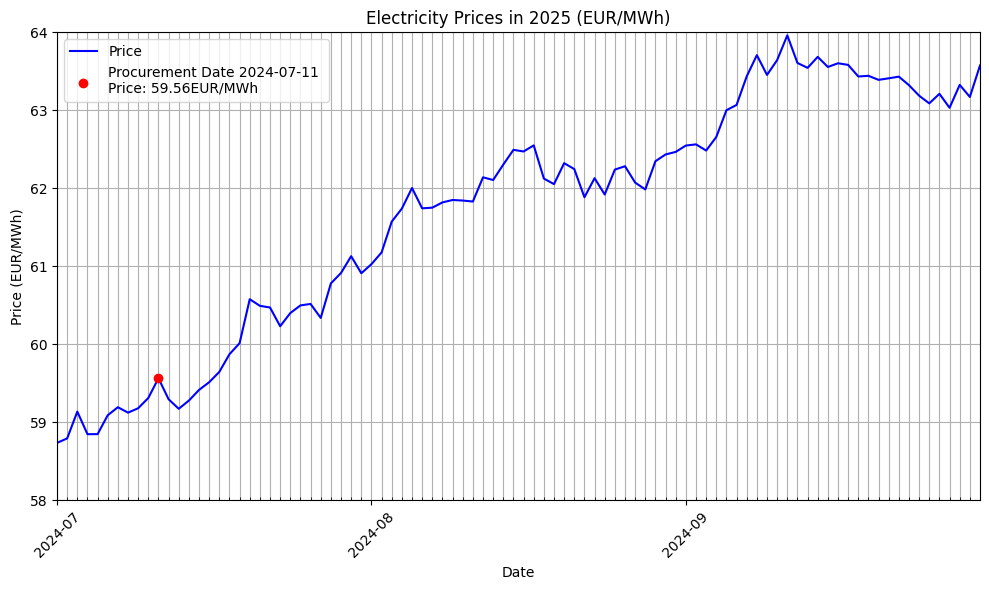

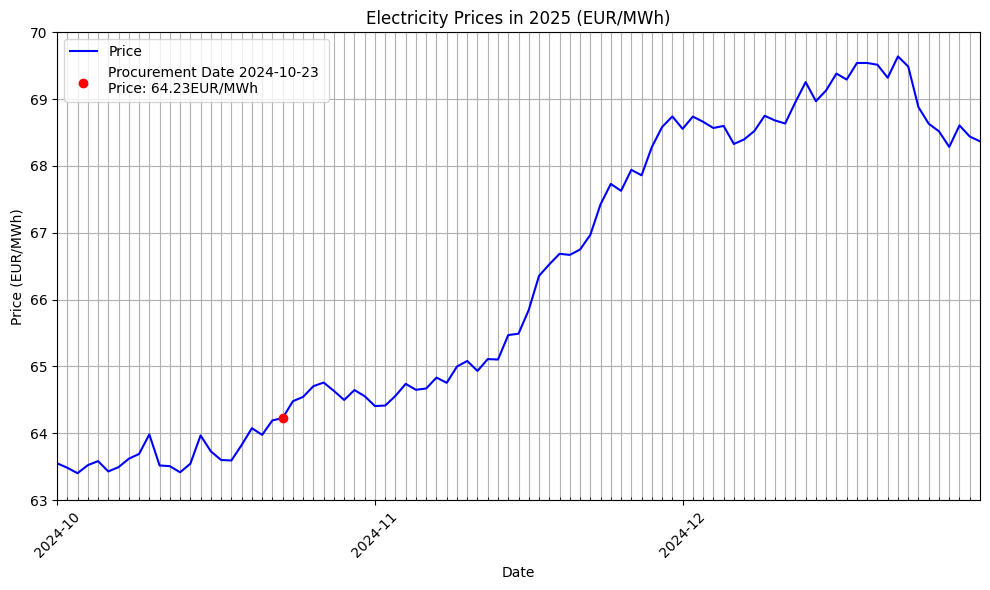

Q1: Procurement Date - 2024-01-14 00:00:00, Procurement Price - 50.99055874689309
Q2: Procurement Date - 2024-04-08 00:00:00, Procurement Price - 57.57043751053623
Q3: Procurement Date - 2024-07-11 00:00:00, Procurement Price - 59.56387011054742
Q4: Procurement Date - 2024-10-23 00:00:00, Procurement Price - 64.22716411350702


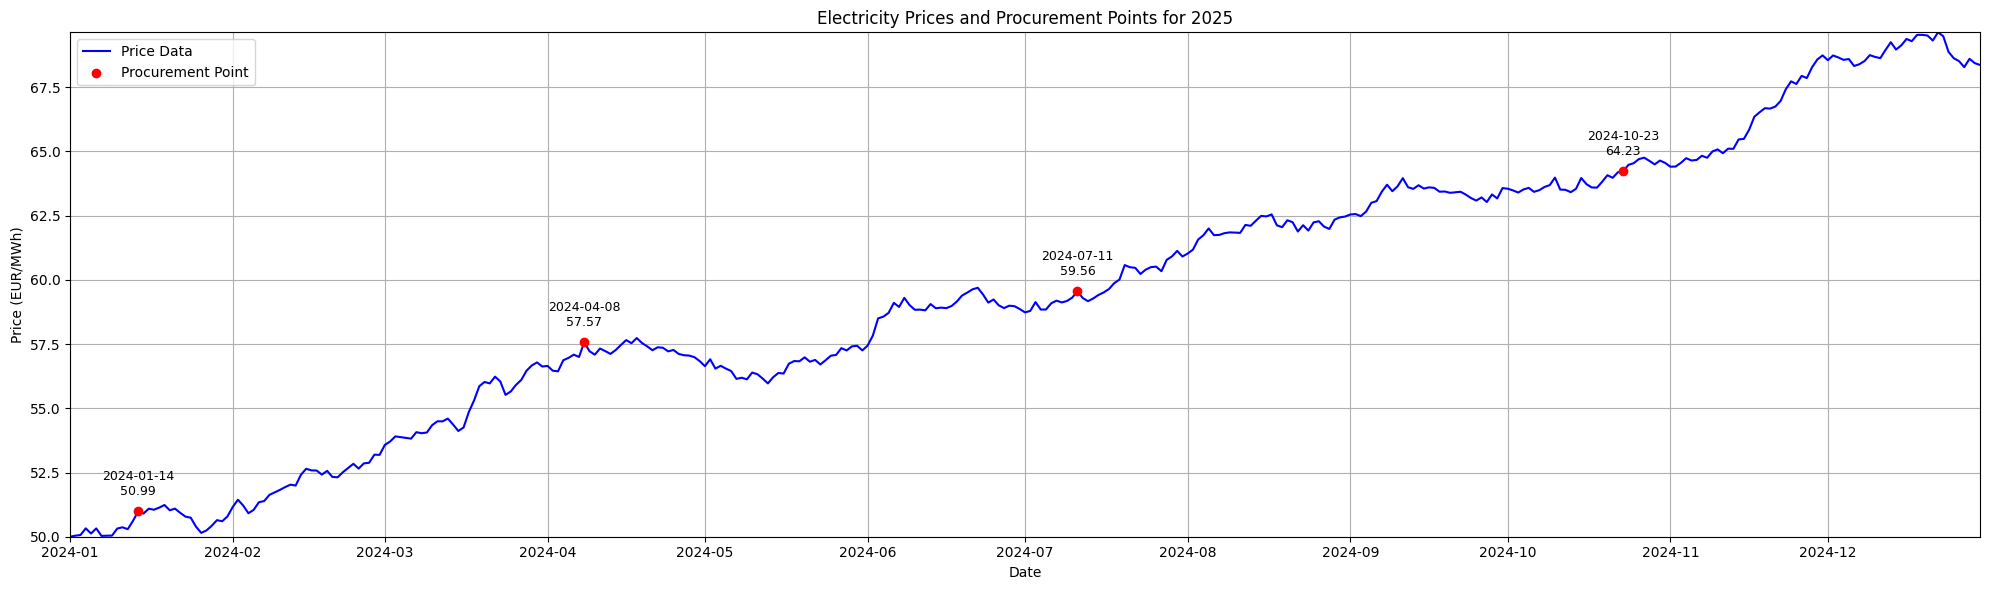

In [10]:
rising_procurement = quarterly_procurement(df_rising, 0.8)

In [28]:
procurement_cost(df_rising, rising_procurement)

(31018996.07, 31794360.0, 775363.93)

## Quarterly procurement on falling trend

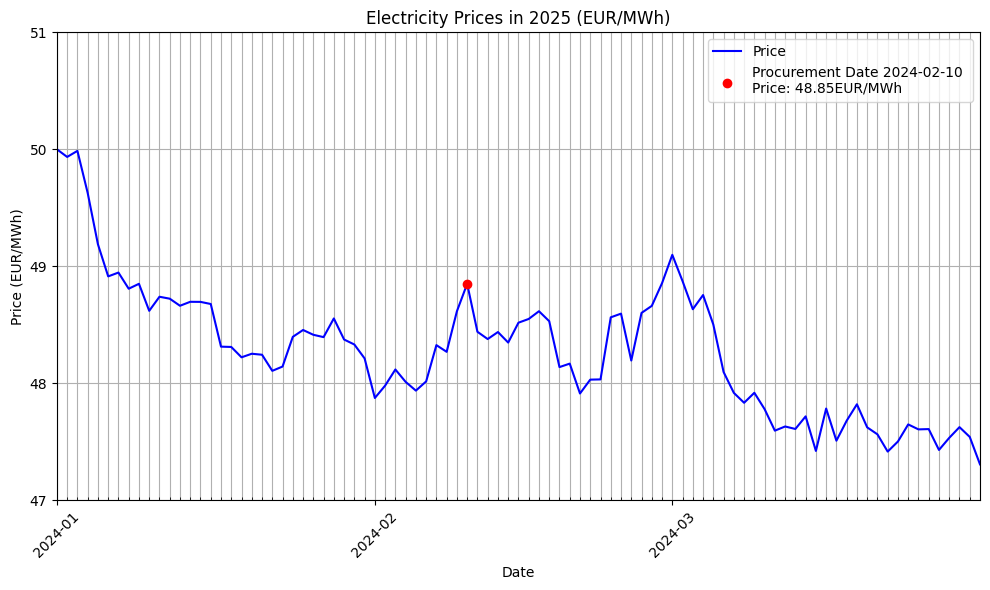

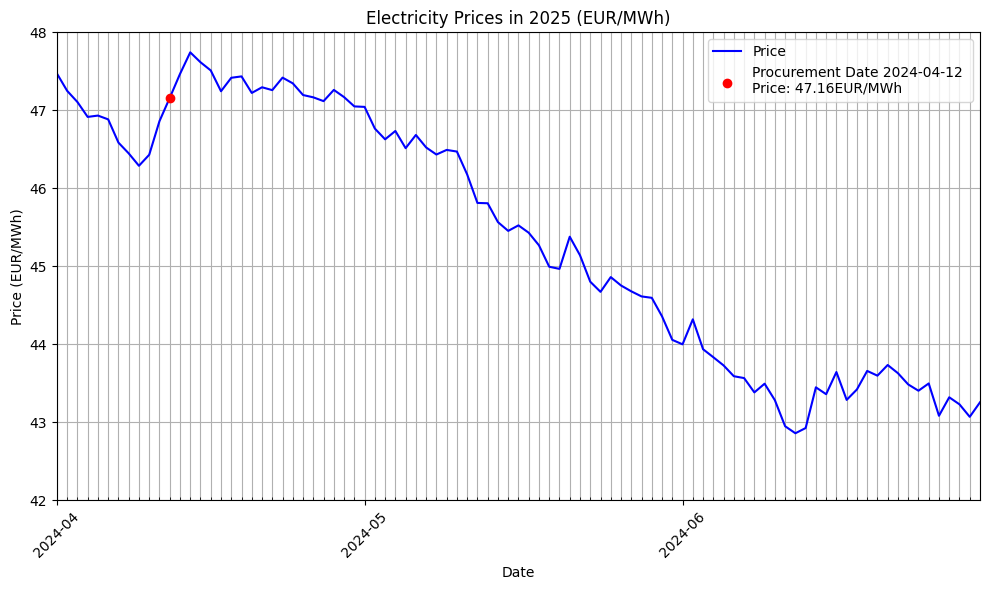

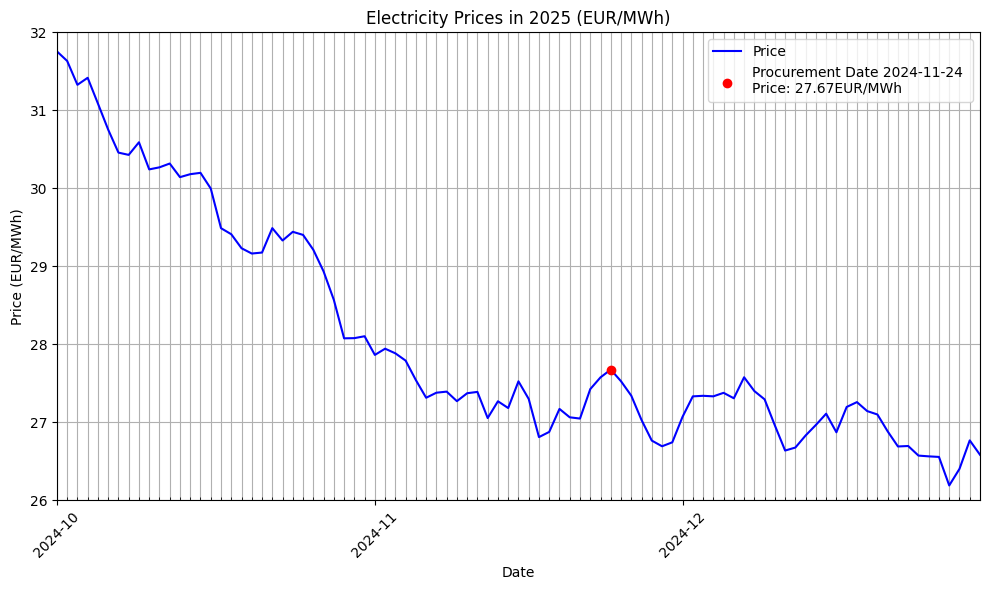

Q1: Procurement Date - 2024-02-10 00:00:00, Procurement Price - 48.849806348301044
Q2: Procurement Date - 2024-04-12 00:00:00, Procurement Price - 47.15909994378199
Q3: Procurement Date - 2024-09-30 00:00:00, Procurement Price - 32.13956464133321
Q4: Procurement Date - 2024-11-24 00:00:00, Procurement Price - 27.673797467941732


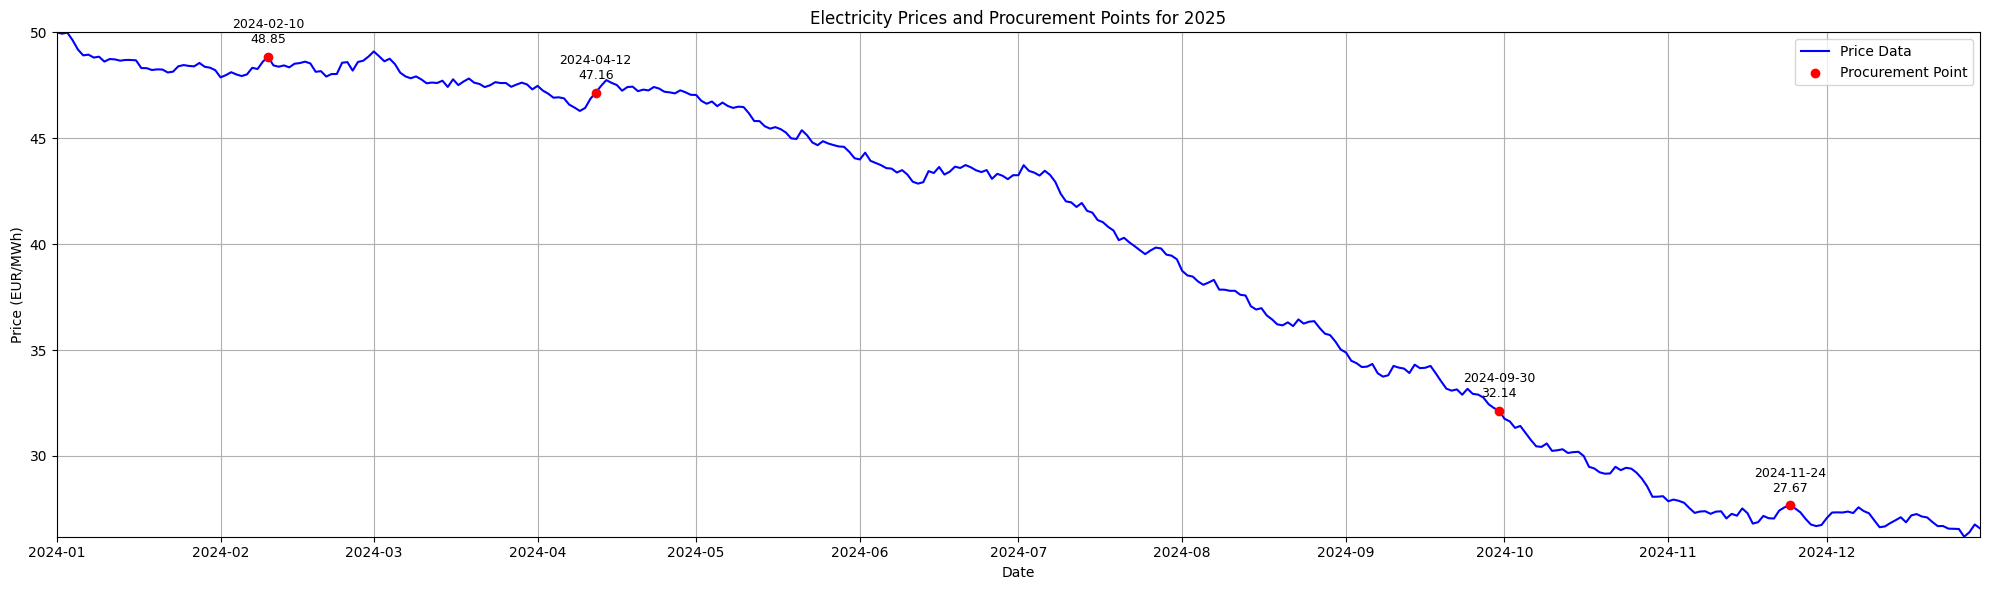

In [29]:
falling_procurement = quarterly_procurement(df_falling,0.8)

In [30]:
procurement_cost(df_falling, falling_procurement)

(20802272.83, 21237180.0, 434907.17)

## Quarterly procurement on no trend

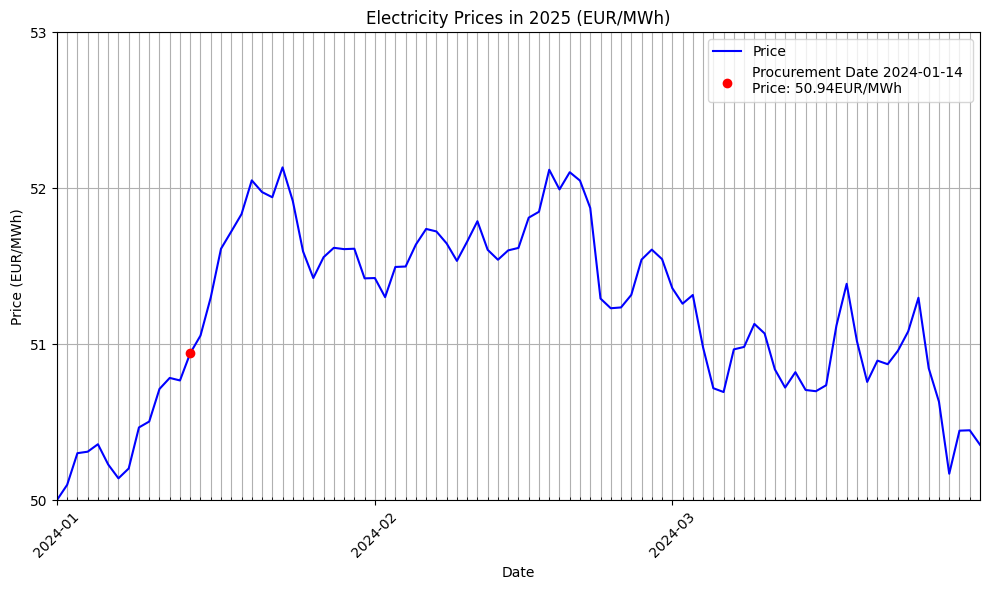

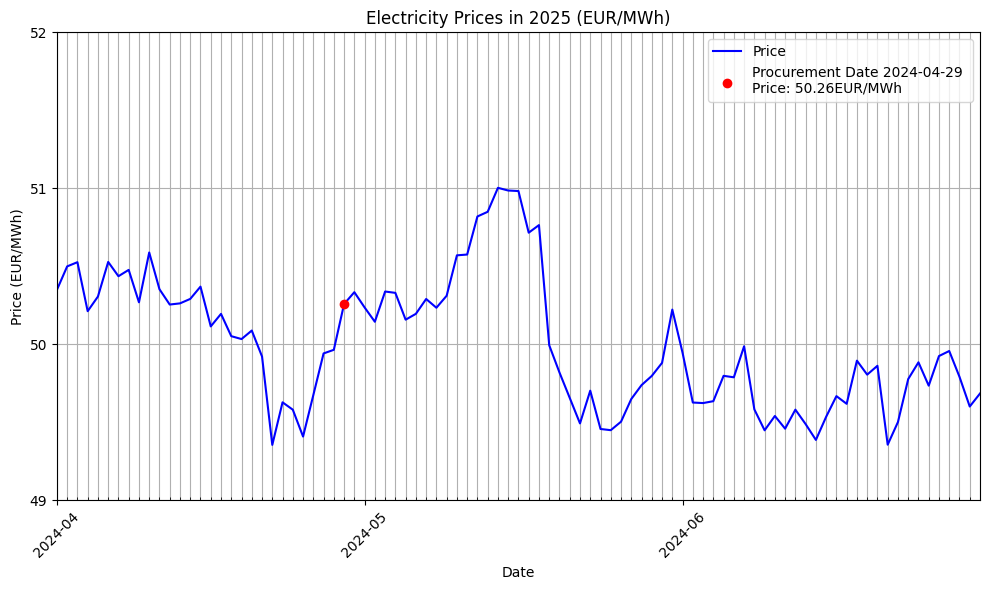

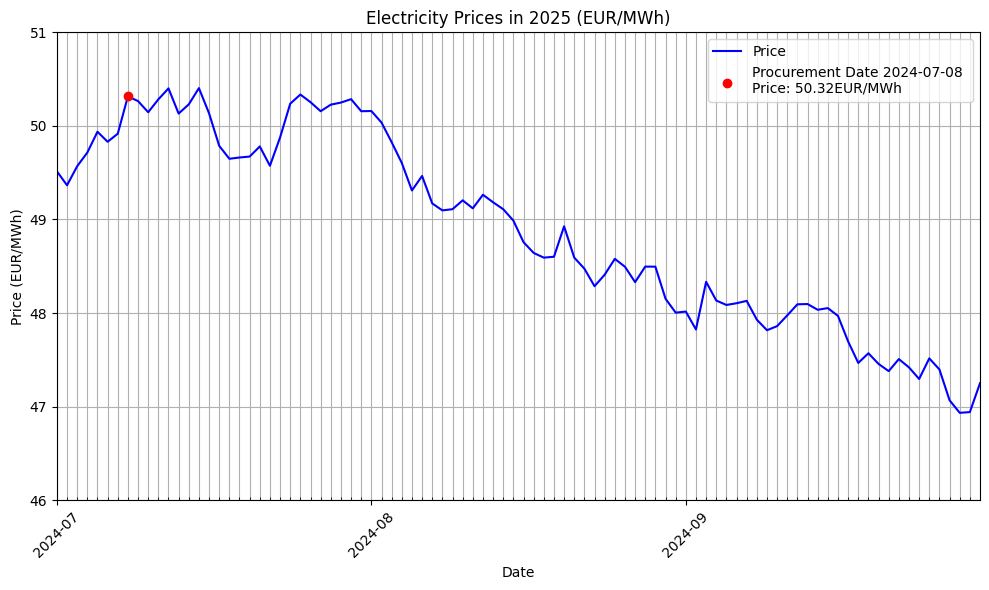

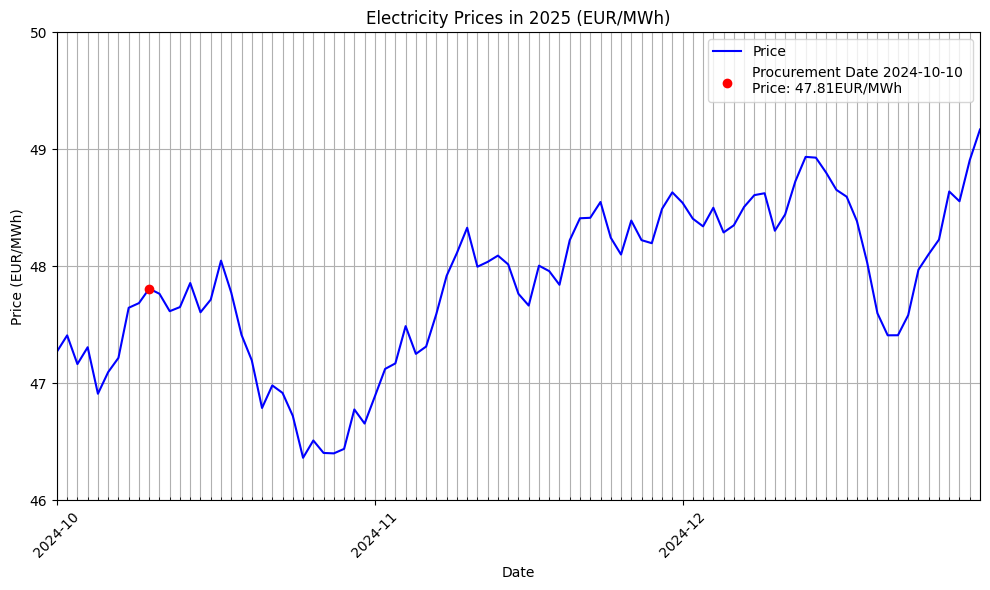

Q1: Procurement Date - 2024-01-14 00:00:00, Procurement Price - 50.94231715518014
Q2: Procurement Date - 2024-04-29 00:00:00, Procurement Price - 50.25790336363723
Q3: Procurement Date - 2024-07-08 00:00:00, Procurement Price - 50.31580901611049
Q4: Procurement Date - 2024-10-10 00:00:00, Procurement Price - 47.80802338440949


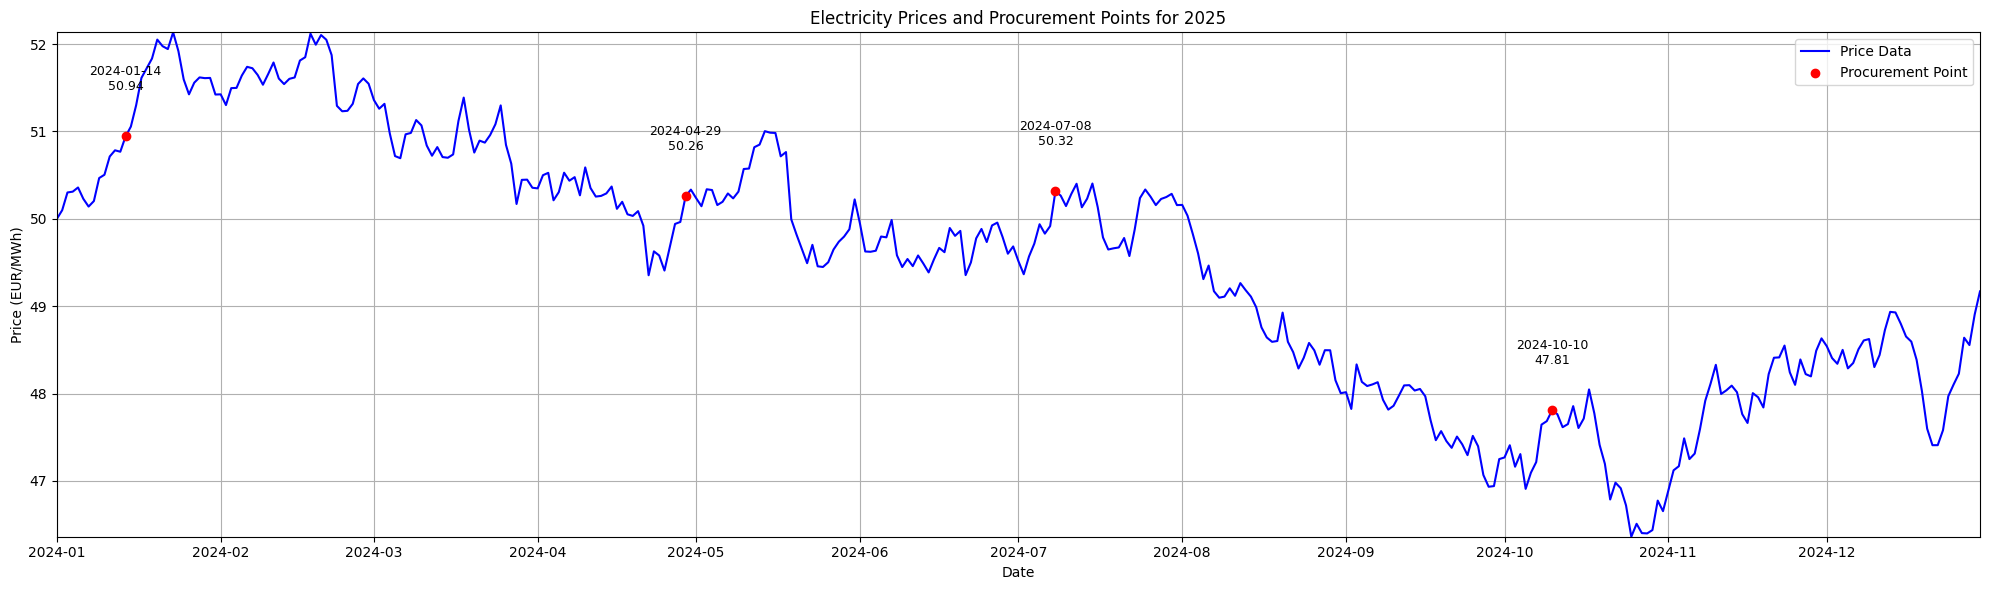

In [32]:
no_trend_procurement = quarterly_procurement(df_no_trend, 0.8)

In [33]:
procurement_cost(df_no_trend, no_trend_procurement)

(26609761.06, 26422320.0, -187441.06)